# Import

In [7]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import copy

sns.set(style="whitegrid", font="Source Sans Pro", font_scale=1.4)

from vpython import vector

# Constants

Data from https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html

<table>
<tbody><tr>
  <td align="center">&nbsp;</td>
  <th align="center">&nbsp;<br>&nbsp;&nbsp; Mercury &nbsp;&nbsp;</th>
  <th align="center">&nbsp;<br>&nbsp;&nbsp; Earth &nbsp;&nbsp;</th>
  <th align="center">Ratio<br>(Mercury/Earth)</th>
</tr>

<tr>
  <th align="left">Semimajor axis (10<sup>6</sup> km)</th>
  <td align="center">57.91</td>
  <td align="center">149.60</td>
  <td align="center">0.387</td>
</tr>     
<tr>
  <th align="left">Sidereal orbit period (days)</th>
  <td align="center">87.969</td>
  <td align="center">365.256</td>
  <td align="center">0.241</td>
</tr>
<tr>
  <th align="left">Tropical orbit period (days)</th>
  <td align="center">87.968</td>
  <td align="center">365.242</td>
  <td align="center">0.241</td>
</tr>
<tr>
  <th align="left">Perihelion (10<sup>6</sup> km)</th>
  <td align="center">46.00</td>
  <td align="center">147.09</td>
  <td align="center">0.313</td>
</tr>
<tr>
  <th align="left">Aphelion (10<sup>6</sup> km)</th>
  <td align="center">69.82</td>
  <td align="center">152.10</td>
  <td align="center">0.459</td>
</tr>
<tr>
  <th align="left">Synodic period (days)</th>
  <td align="center">115.88</td>
  <td align="center"> - </td>
  <td align="center"> - </td>
</tr>
<tr>
  <th align="left">Mean orbital velocity (km/s)</th>
  <td align="center">47.36</td>
  <td align="center">29.78</td>
  <td align="center">1.590</td>
</tr>
<tr>
  <th align="left">Max. orbital velocity (km/s)</th>
  <td align="center">58.98</td>
  <td align="center">30.29</td>
  <td align="center">1.947</td>
</tr>
<tr>
  <th align="left">Min. orbital velocity (km/s)</th>
  <td align="center">38.86</td>
  <td align="center">29.29</td>
  <td align="center">1.327</td>
</tr>
<tr>
  <th align="left">Orbit inclination (deg)</th>
  <td align="center">7.00</td>
  <td align="center">0.00</td>
  <td align="center"> - </td>
</tr>
<tr>
  <th align="left">Orbit eccentricity</th>
  <td align="center">0.2056</td>
  <td align="center">0.0167</td>
  <td align="center">12.311</td>
</tr>
<tr>
  <th align="left">Sidereal rotation period (hrs)</th>
  <td align="center">1407.6</td>
  <td align="center">23.9345</td>
  <td align="center">58.785</td>
</tr>
<tr>
  <th align="left">Length of day (hrs)</th>
  <td align="center">4222.6</td>
  <td align="center">24.0000</td>
  <td align="center">175.942</td>
</tr>
<tr>
  <th align="left">Obliquity to orbit (deg)</th>
  <td align="center">0.034</td>
  <td align="center">23.44</td>
  <td align="center">0.001</td>
</tr>
<tr>
  <th align="left">Inclination of equator (deg)</th>
  <td align="center">0.034</td>
  <td align="center">23.44</td>
  <td align="center">0.001</td>
</tr>
</tbody></table>

In [8]:
R0 = 1e10
T0 = 24*60*60

In [9]:
rA = 69816900000./R0
rP = 46001200000./R0
vA = 38.86e3/R0*T0
vP = 58.98e3/R0*T0

In [10]:
aM  =0.99 
LdM = 2.71221*1e15 * T0 / R0**2

# Simulation

In [11]:
dt = 0.1

TMax = 120 * 1

NTmax=int(TMax*1./dt)

trange=np.linspace(0,TMax, NTmax)

print NTmax *dt

120.0


## Regular

In [12]:
xN = []
yN = []

rm = vector(rP,0,0)
vm = vector(0,vP,0)

for nt in range(NTmax):
    a=1./(rm.mag)**3*(-rm)*(aM) 
    #a=1./(r.mag)**3*r*(c22rS+1.*c22rS2/(r.mag)) 

    vm+=a*dt
    rm+=vm*dt

    xN.append(rm.x)
    yN.append(rm.y)


xN = np.array(xN)
yN = np.array(yN)
rN = np.sqrt(xN**2+yN**2)

## Verlet

In [13]:
xV = []
yV = []

rm = vector(rP,0,0)
vm = vector(0,vP,0)

r_prev = 1*rm 
rm     = rm + vm*dt + 0.5*dt**2 / (rm.mag)**3*(-rm)*(aM)


for nt in range(NTmax):
    a=1./(rm.mag)**3*(-rm)*(aM) 
    #a=1./(r.mag)**3*r*(c22rS+1.*c22rS2/(r.mag)) 

    tmp    = 1*rm 
    rm     = 2*rm-r_prev+a*dt**2
    r_prev = tmp

    xV.append(rm.x)
    yV.append(rm.y)


xV = np.array(xV)
yV = np.array(yV)
rV = np.sqrt(xV**2+yV**2)

## LeapFrog

In [14]:
xL = []
yL = []

rm = vector(rP,0,0)
vm = vector(0,vP,0)

for nt in range(NTmax):
    #Beschleunigung
    rm += vm*dt/2
    a=1./(rm.mag)**3*(-rm)*(aM)
    vm += a*dt
    rm += vm*dt/2

    xL.append(rm.x)
    yL.append(rm.y)

xL = np.array(xL)
yL = np.array(yL)
rL = np.sqrt(xL**2+yL**2)

## Plot

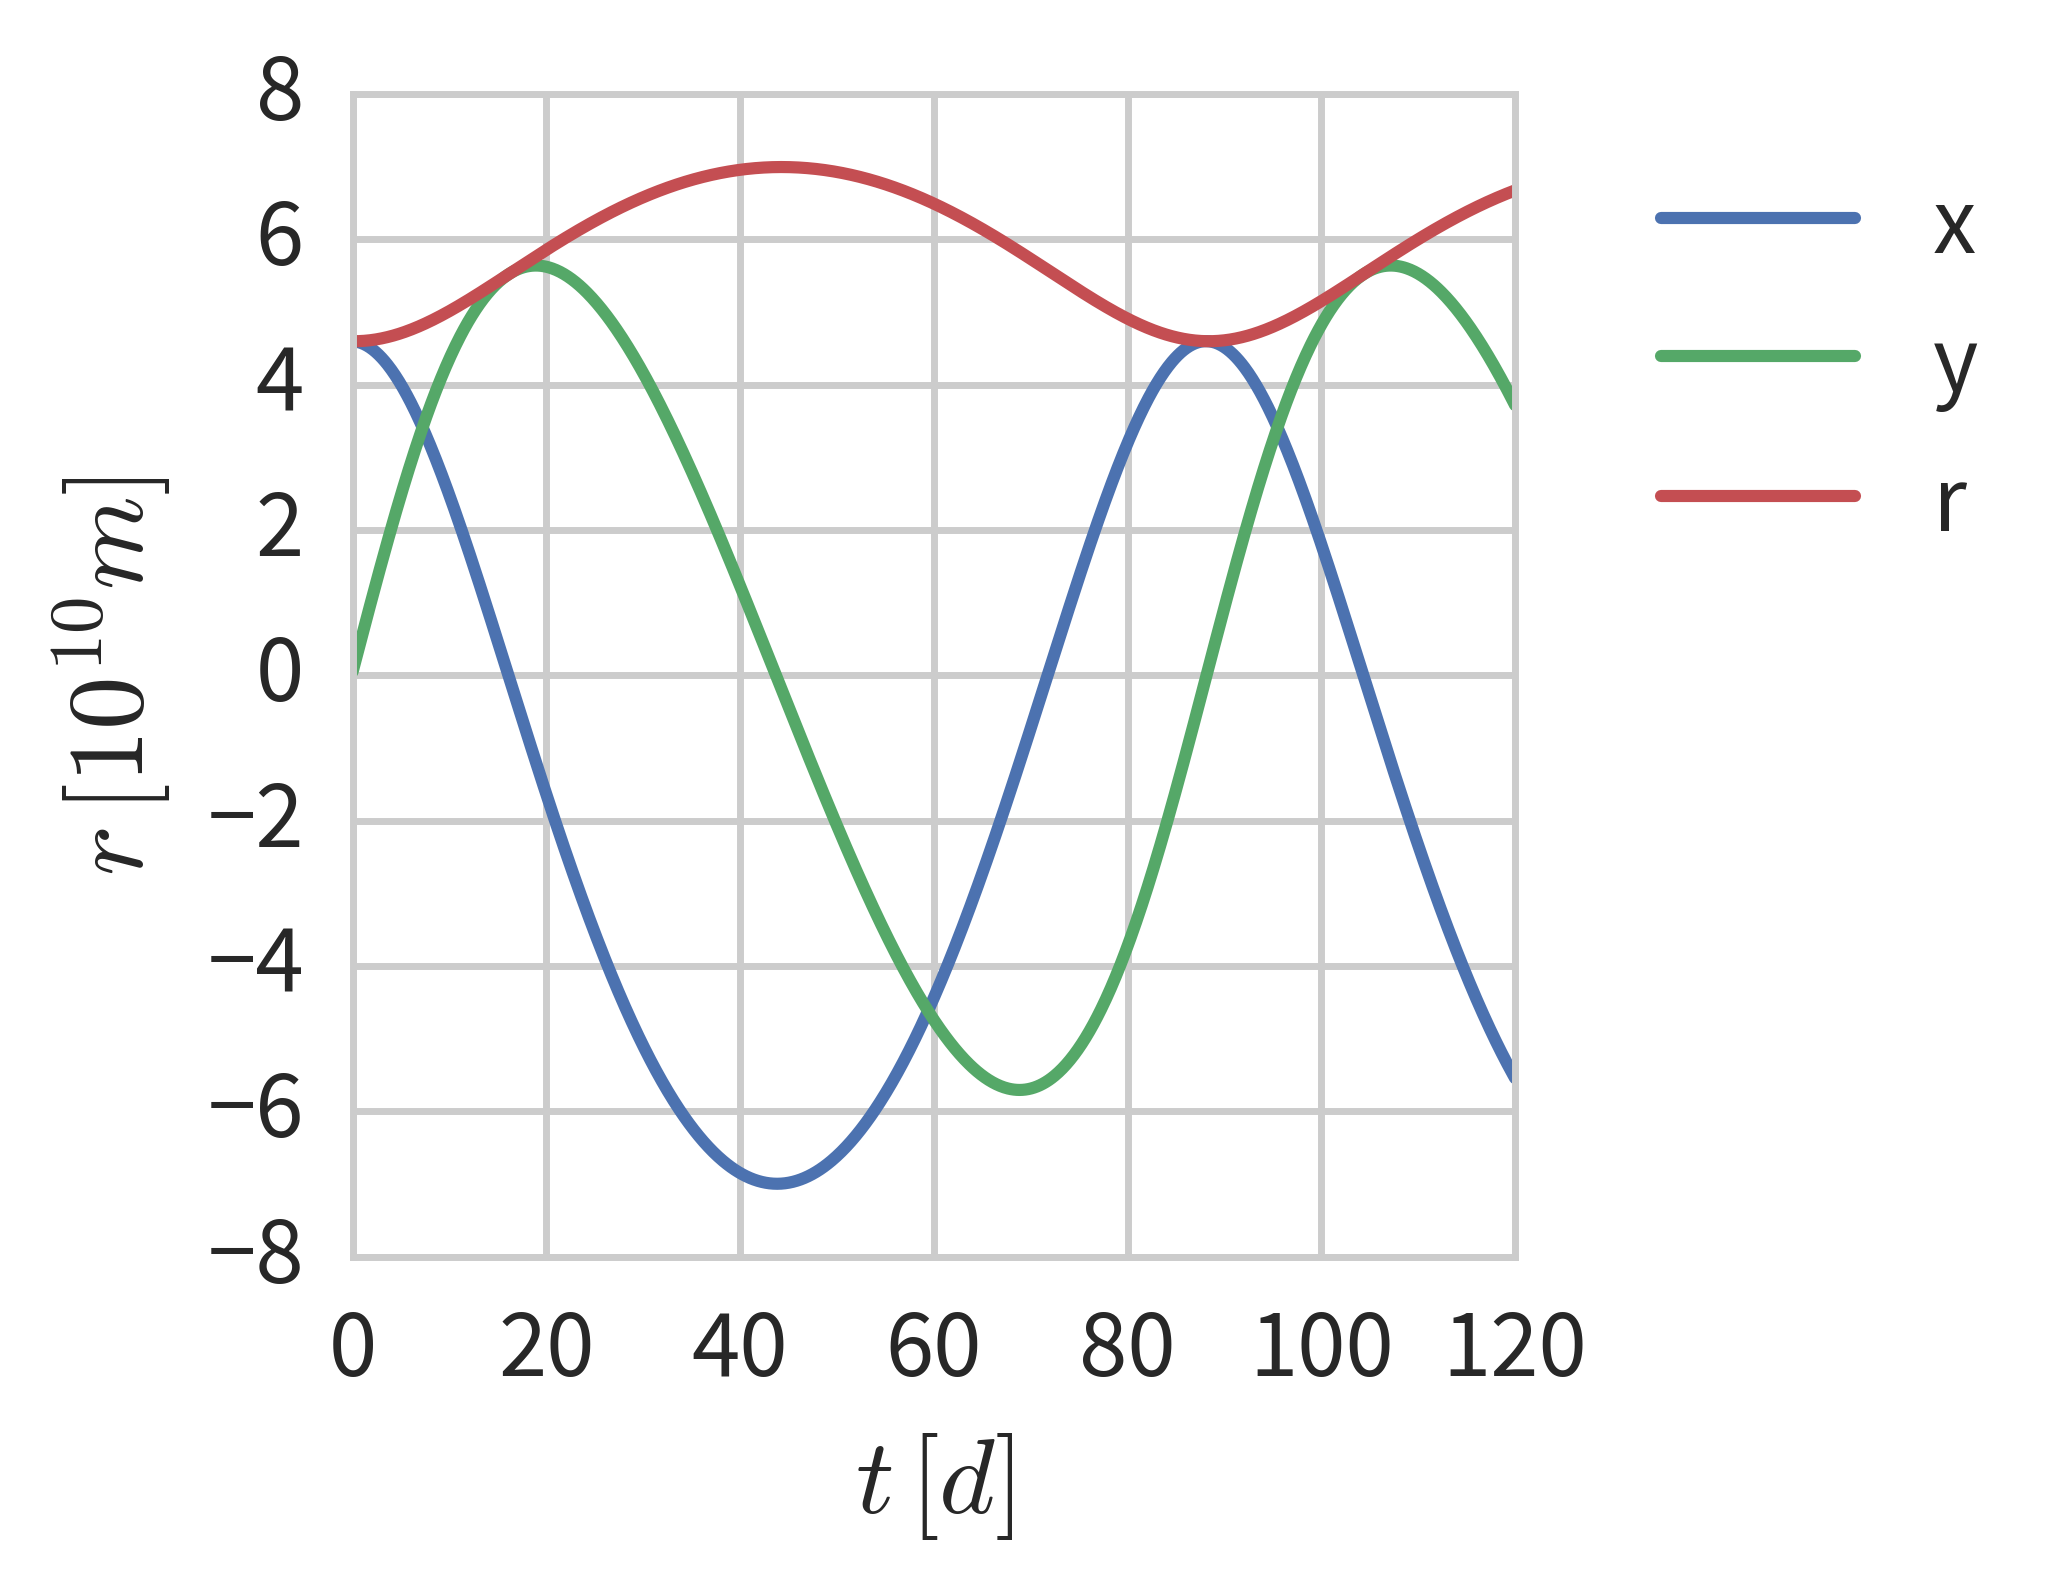

In [15]:
fig = plt.figure(figsize=(3,3), dpi=500)

trange = np.linspace(0,NTmax*dt, NTmax)

plt.plot(trange, xN, label="x")
plt.plot(trange, yN, label="y")

plt.plot(trange, rN,label="r")

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.xlabel("$t \, [d]$")

plt.ylabel("$r \, [10^{10}m]$")

plt.show()

# Compare to Analytic

Solutions to the Runge-Lenz vector for mercury result in
$$
    \frac{1}{r(t)} = \frac{m_M k}{L^2}\left(
        1 + \frac{A}{m_M k} \cos(\theta)
    \right)
$$
with
$k = G_N m_M m_S$, $L$ the angular momentum and $A$ the absoulte of the Runge-Lenz vector
solving for $k$ and $L$ by requiring that $r(0) = r_P$ and $r(\pi) = r_A$, one finds
$$
    r(t) = \frac{5.54604 R_0}{ 1 + 0.20563 \cos(\theta)}
$$

In [16]:
def get_xyA(theta):
    xA = 5.54604*np.cos(theta)/(1+0.20563*np.cos(theta))# + rA/3
    yA = 5.54604*np.sin(theta)/(1+0.20563*np.cos(theta))
    return xA, yA

## Orbit

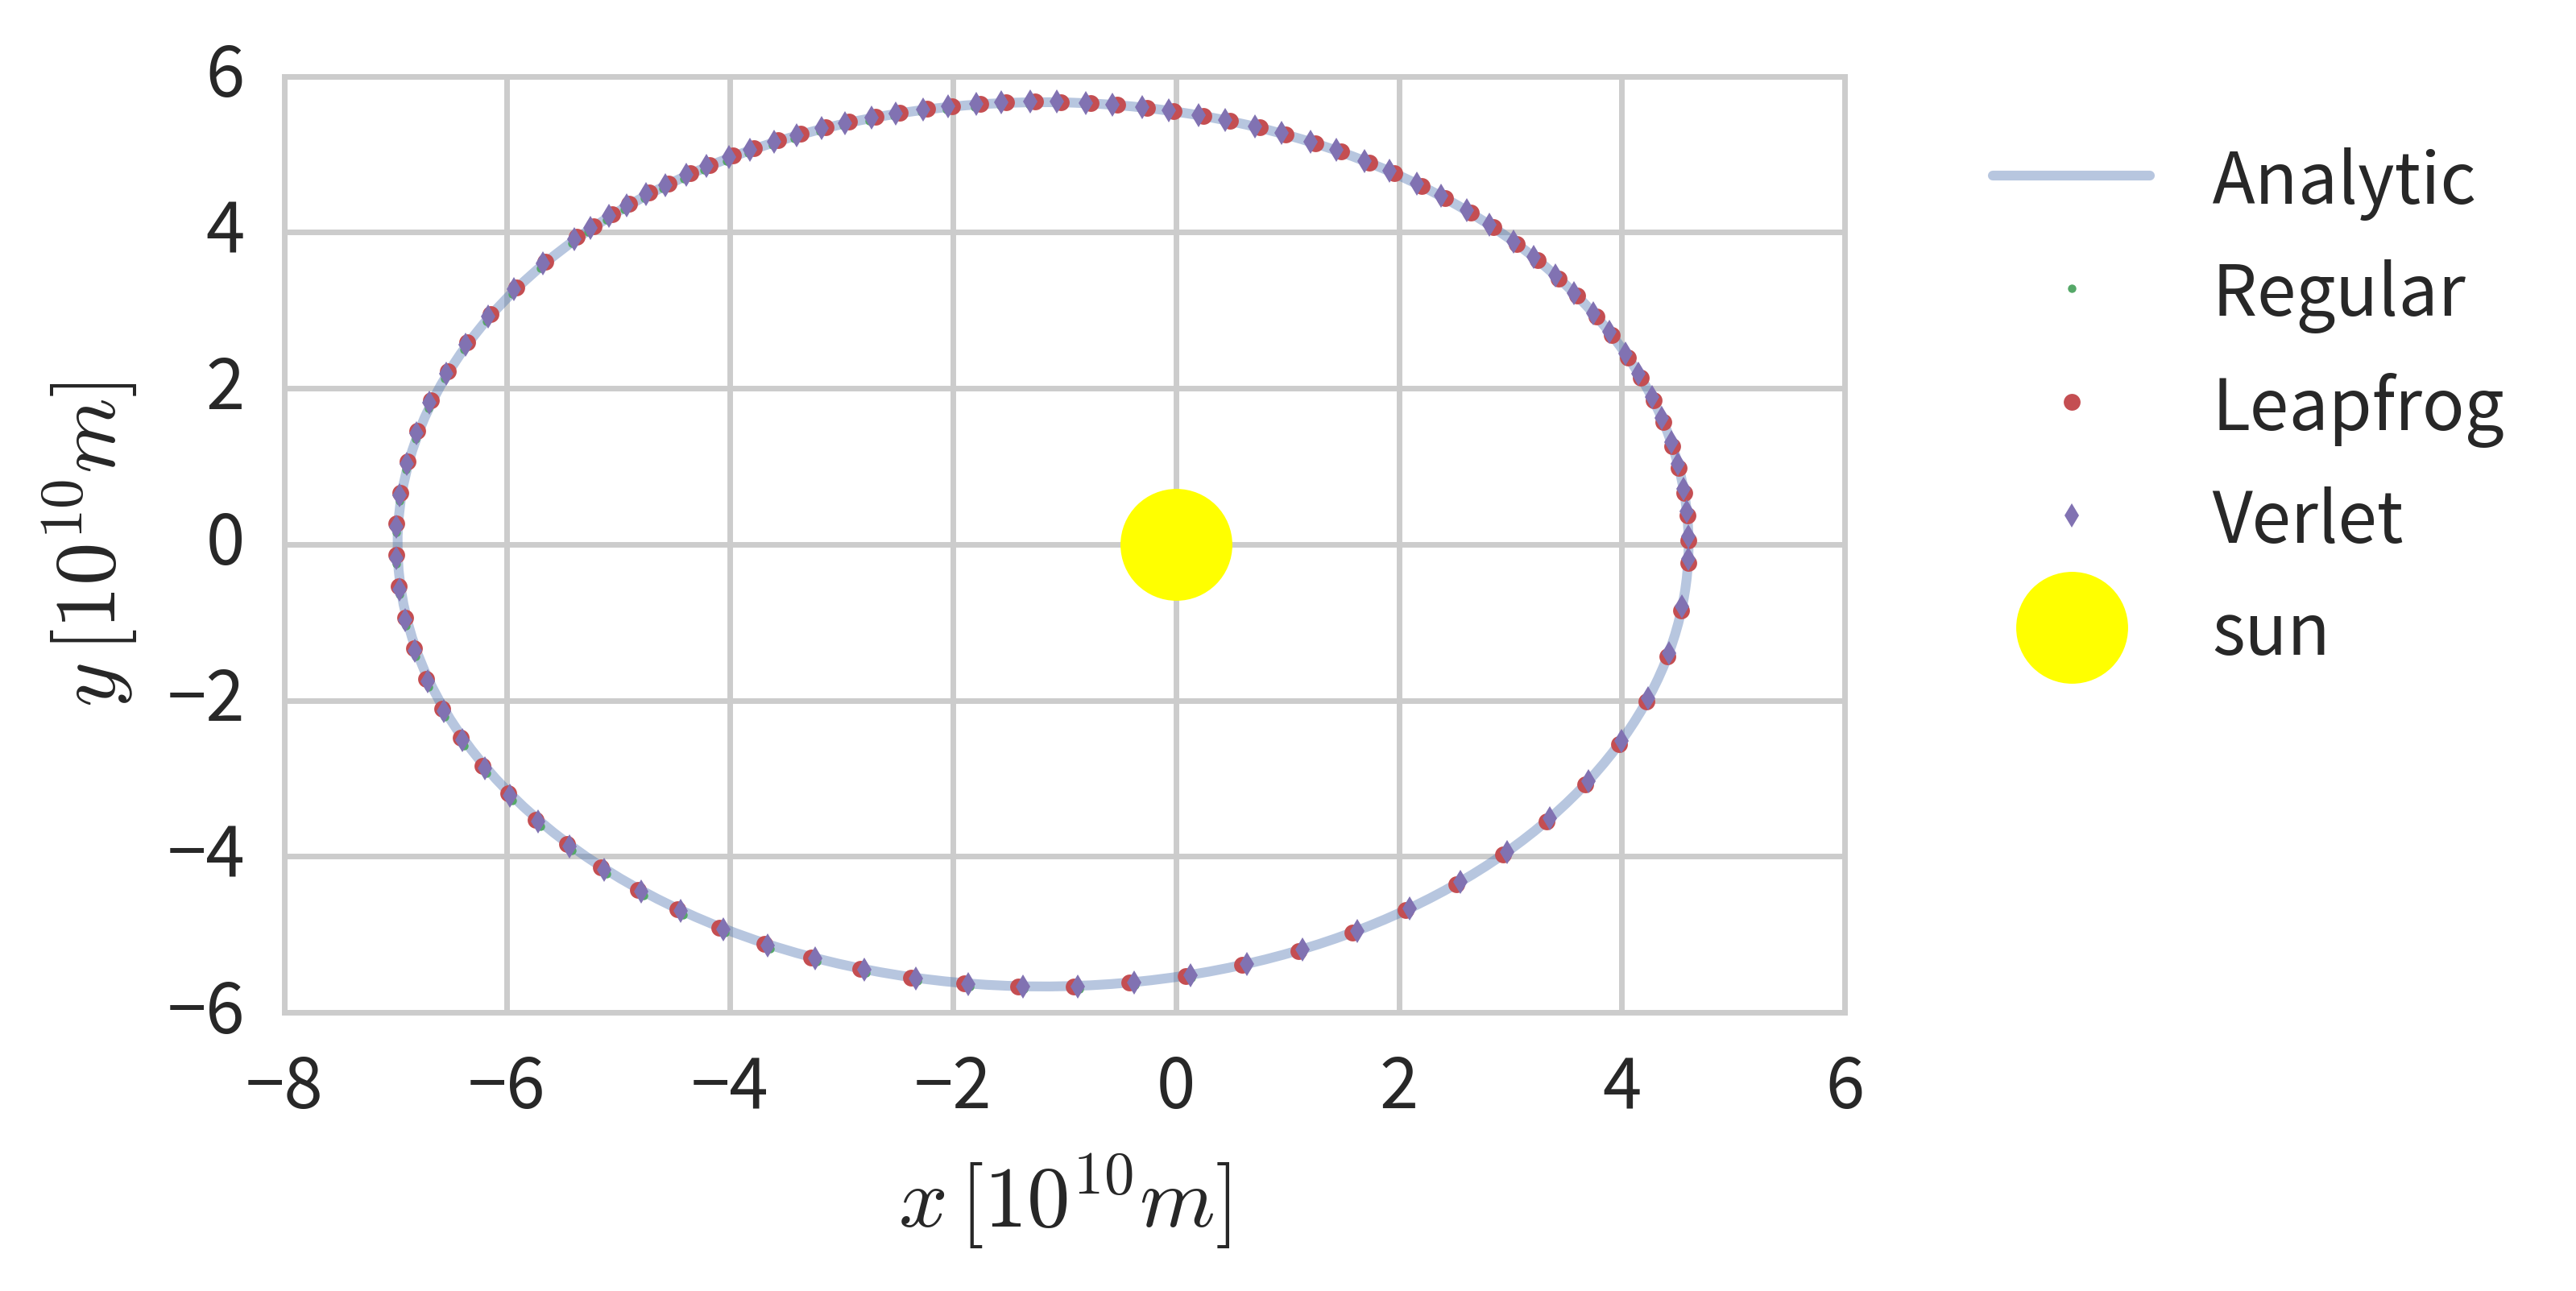

In [17]:
fig = plt.figure(figsize=(5,3), dpi=500)

xAR = []
yAR = []

for theta in np.linspace(0,2*np.pi,200):
    xA, yA = get_xyA(theta)
    yAR += [yA]
    xAR += [xA]

plt.plot(xAR,yAR, label="Analytic", alpha=.4)

NStep = int( NTmax/100. )

plt.plot(xN[::NStep], yN[::NStep], label="Regular", linestyle="None", marker=".", markersize=3)
plt.plot(xL[::NStep], yL[::NStep], label="Leapfrog", linestyle="None", marker="o", markersize=3)
plt.plot(xV[::NStep], yV[::NStep], label="Verlet", linestyle="None", marker="d", markersize=3)

plt.plot(0,0, marker="o", markersize=20, color="yellow", label="sun", linestyle="None")

plt.ylabel(r"$y \, [10^{10}m]$")
plt.xlabel(r"$x \, [10^{10}m]$")

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.show()

## Error Analysis

### Angle

The anlge $\theta(t)$ can be computed according to
$$
    \theta(t) 
    = \int _{0}^{t} d \tau \frac{d \theta(\tau)}{d \tau}
    = \int _{0}^{t} d \tau \frac{L}{m r^2(\tau)}
$$

In [18]:
def get_theta(x,y):
    thetaR = []
    theta = 0
    for ex, ey in zip(x,y):
        theta += LdM /(ex**2 + ey**2)*dt
        thetaR += [theta]
    return np.array(thetaR)

In [19]:
numerical_res = {
    "Regular" : (xN, yN),
    "Verlet"  : (xV, yV),
    "Leapfrog": (xL, yL),  
}

theta_res = {
    "Regular" : get_theta(xN, yN),
    "Verlet"  : get_theta(xV, yV),
    "Leapfrog": get_theta(xL, yL),
}

analytic_res = {}
for key, theta in theta_res.items():
    analytic_res[key] = get_xyA(theta)

In [20]:
err_r = {}
rAd    = {}
for key in analytic_res.keys():
    xA, yA = analytic_res[key]
    x , y  = numerical_res[key]
    rAd[key] = np.sqrt(xA**2 + yA**2)
    err_r[key] = np.sqrt( (x-xA)**2*xA**2 + (y-yA)**2*yA**2 )/rAd[key]
    

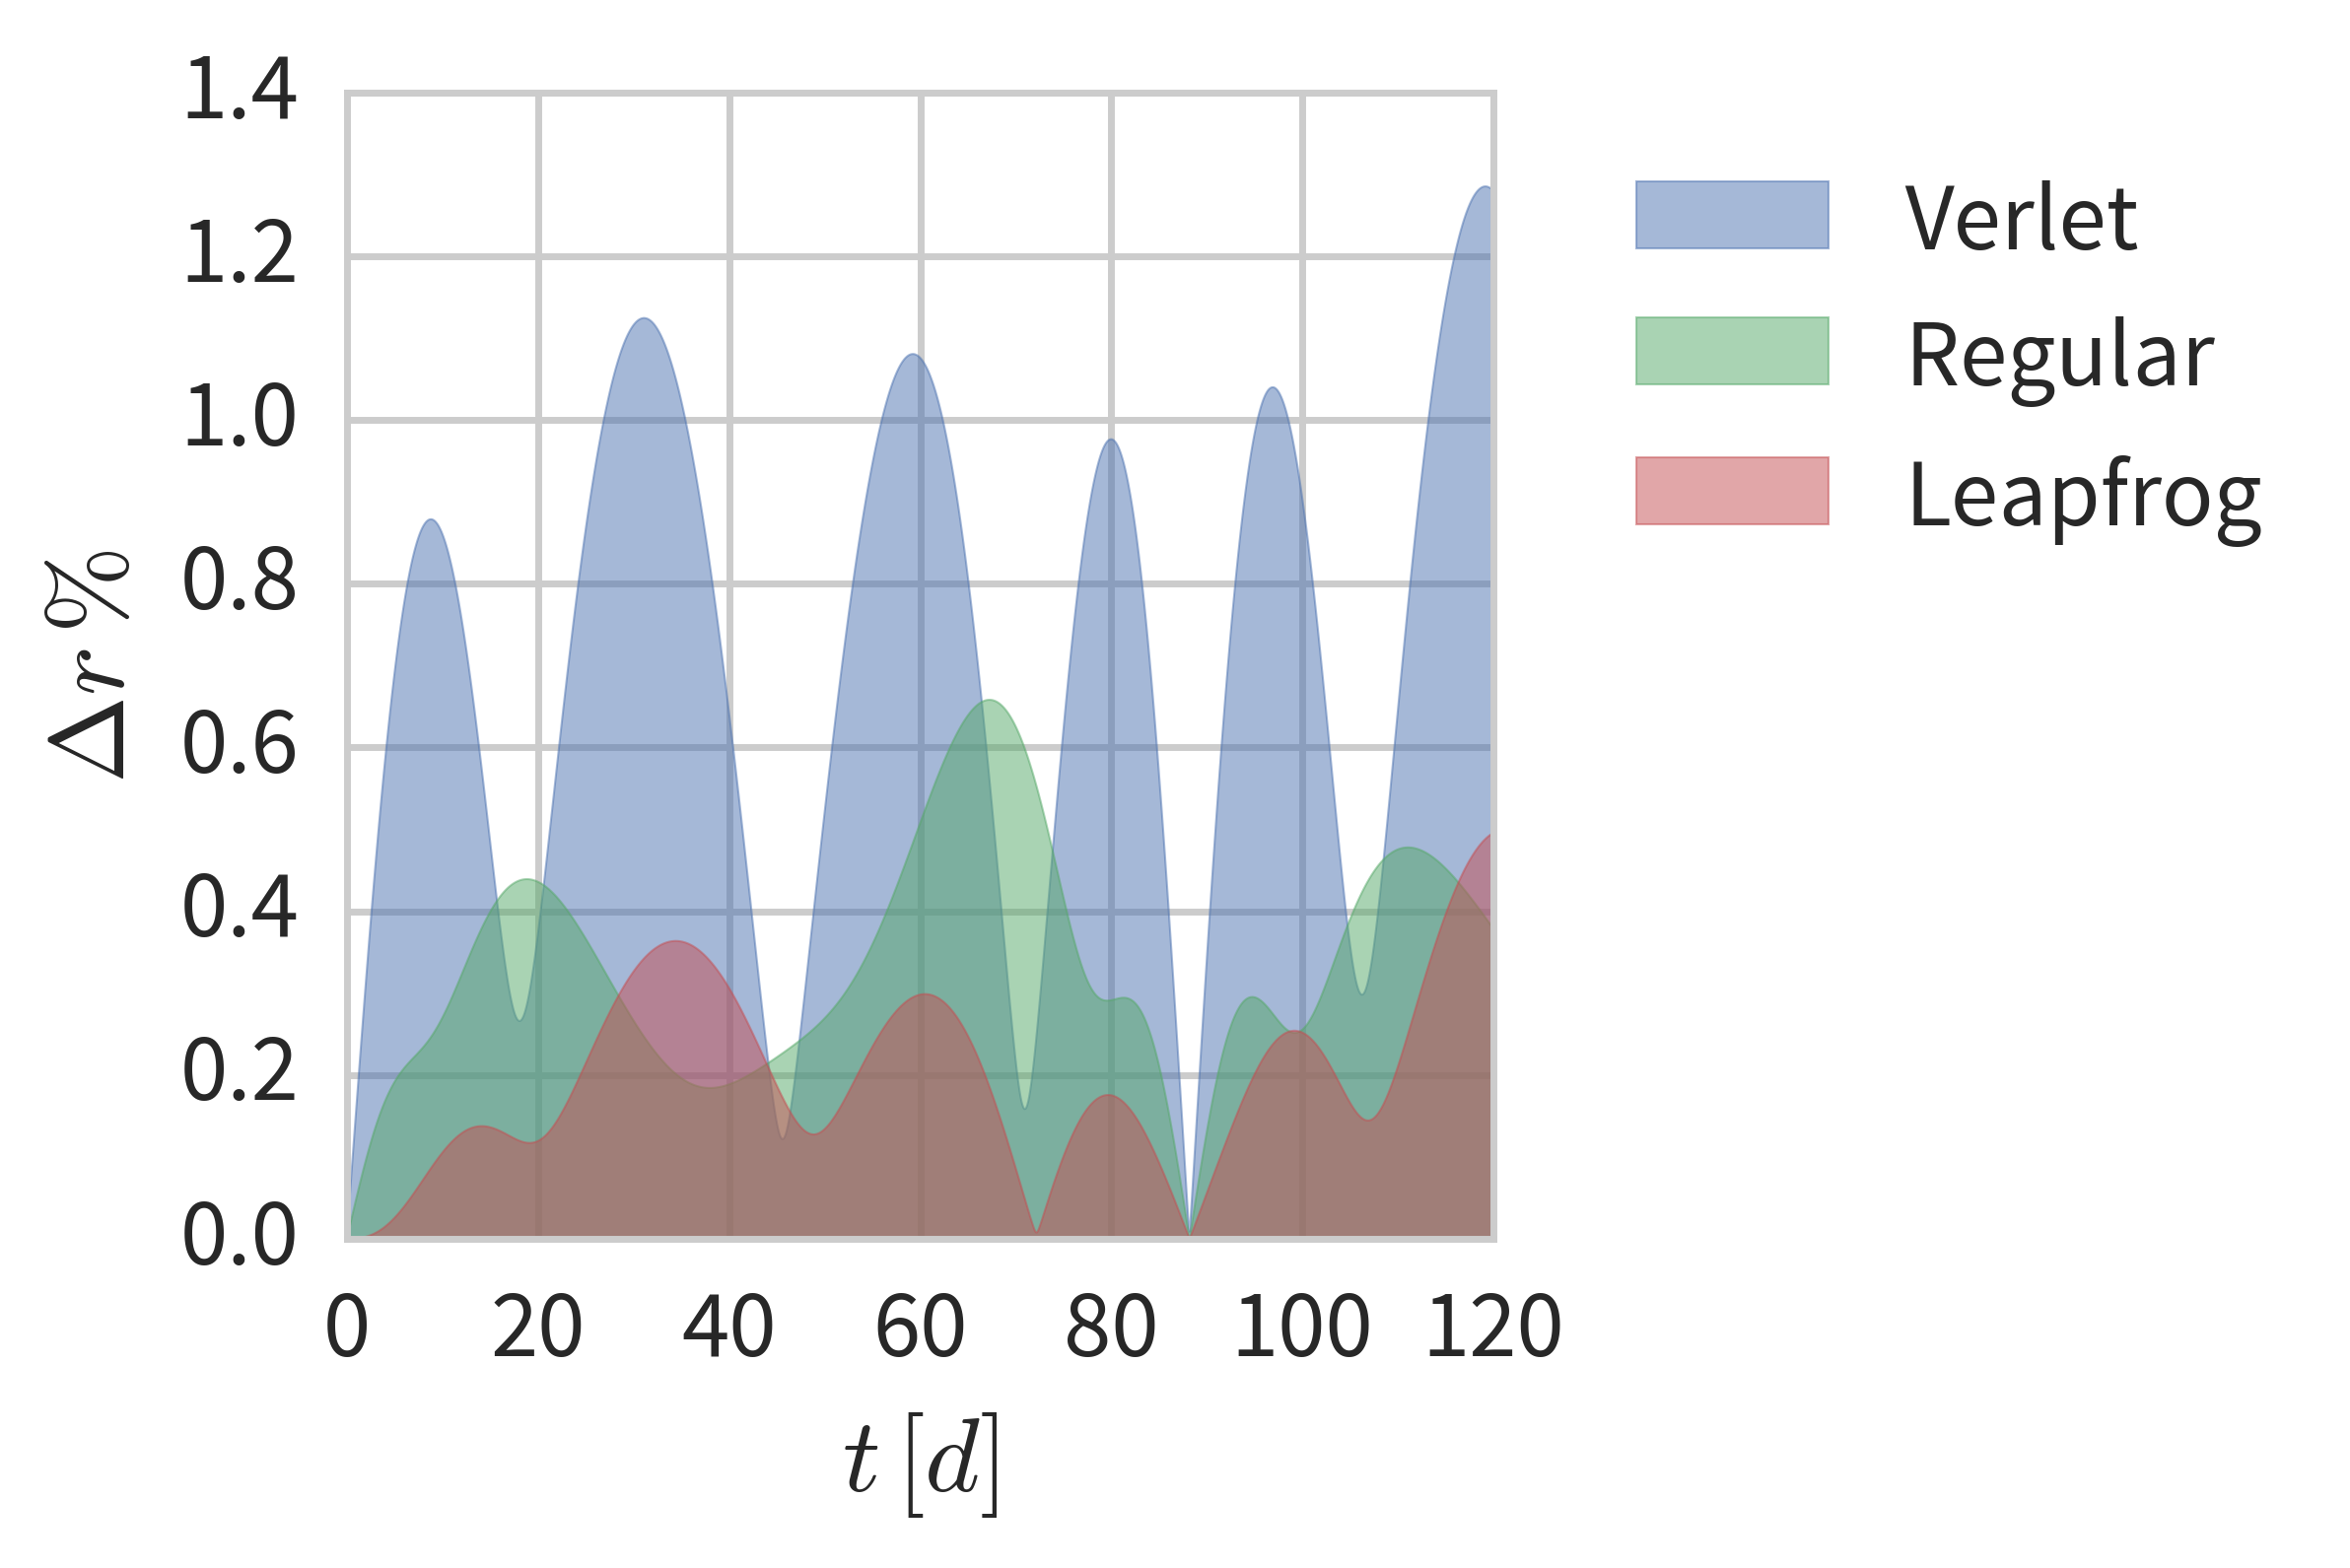

In [21]:
colors = sns.color_palette()

fig = plt.figure(figsize=(3,3), dpi=500)

for nkey, key in enumerate(["Verlet", "Regular","Leapfrog"]):
    plt.fill_between(trange, err_r[key]/rAd[key]*100, label=key, alpha=0.5, color=colors[nkey])

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.xlabel("$t \, [d]$")

plt.ylabel("$\Delta r \, \%$")

ax = plt.gca()

#ax.set_yscale("log")

plt.show()

In [22]:
def get_theta_err(er, rR, NStep=10):
    DeltaTheta = []
    Theta = []
    
    del_theta_int = np.array(er) / np.array(rR)**3 * 2 * LdM
    theta_int     = LdM / np.array(rR)**2
    
    for nt in range(NTmax)[::NStep]:
        DeltaTheta += [np.sum(del_theta_int[:nt])*dt]
        Theta      += [np.sum(theta_int[:nt])*dt]
    
    return np.array(DeltaTheta)/np.array(Theta)

In [23]:
DeltaTheta = {}
for key, er in err_r.items():
    DeltaTheta[key] = get_theta_err(er, rAd[key], NStep=NStep)

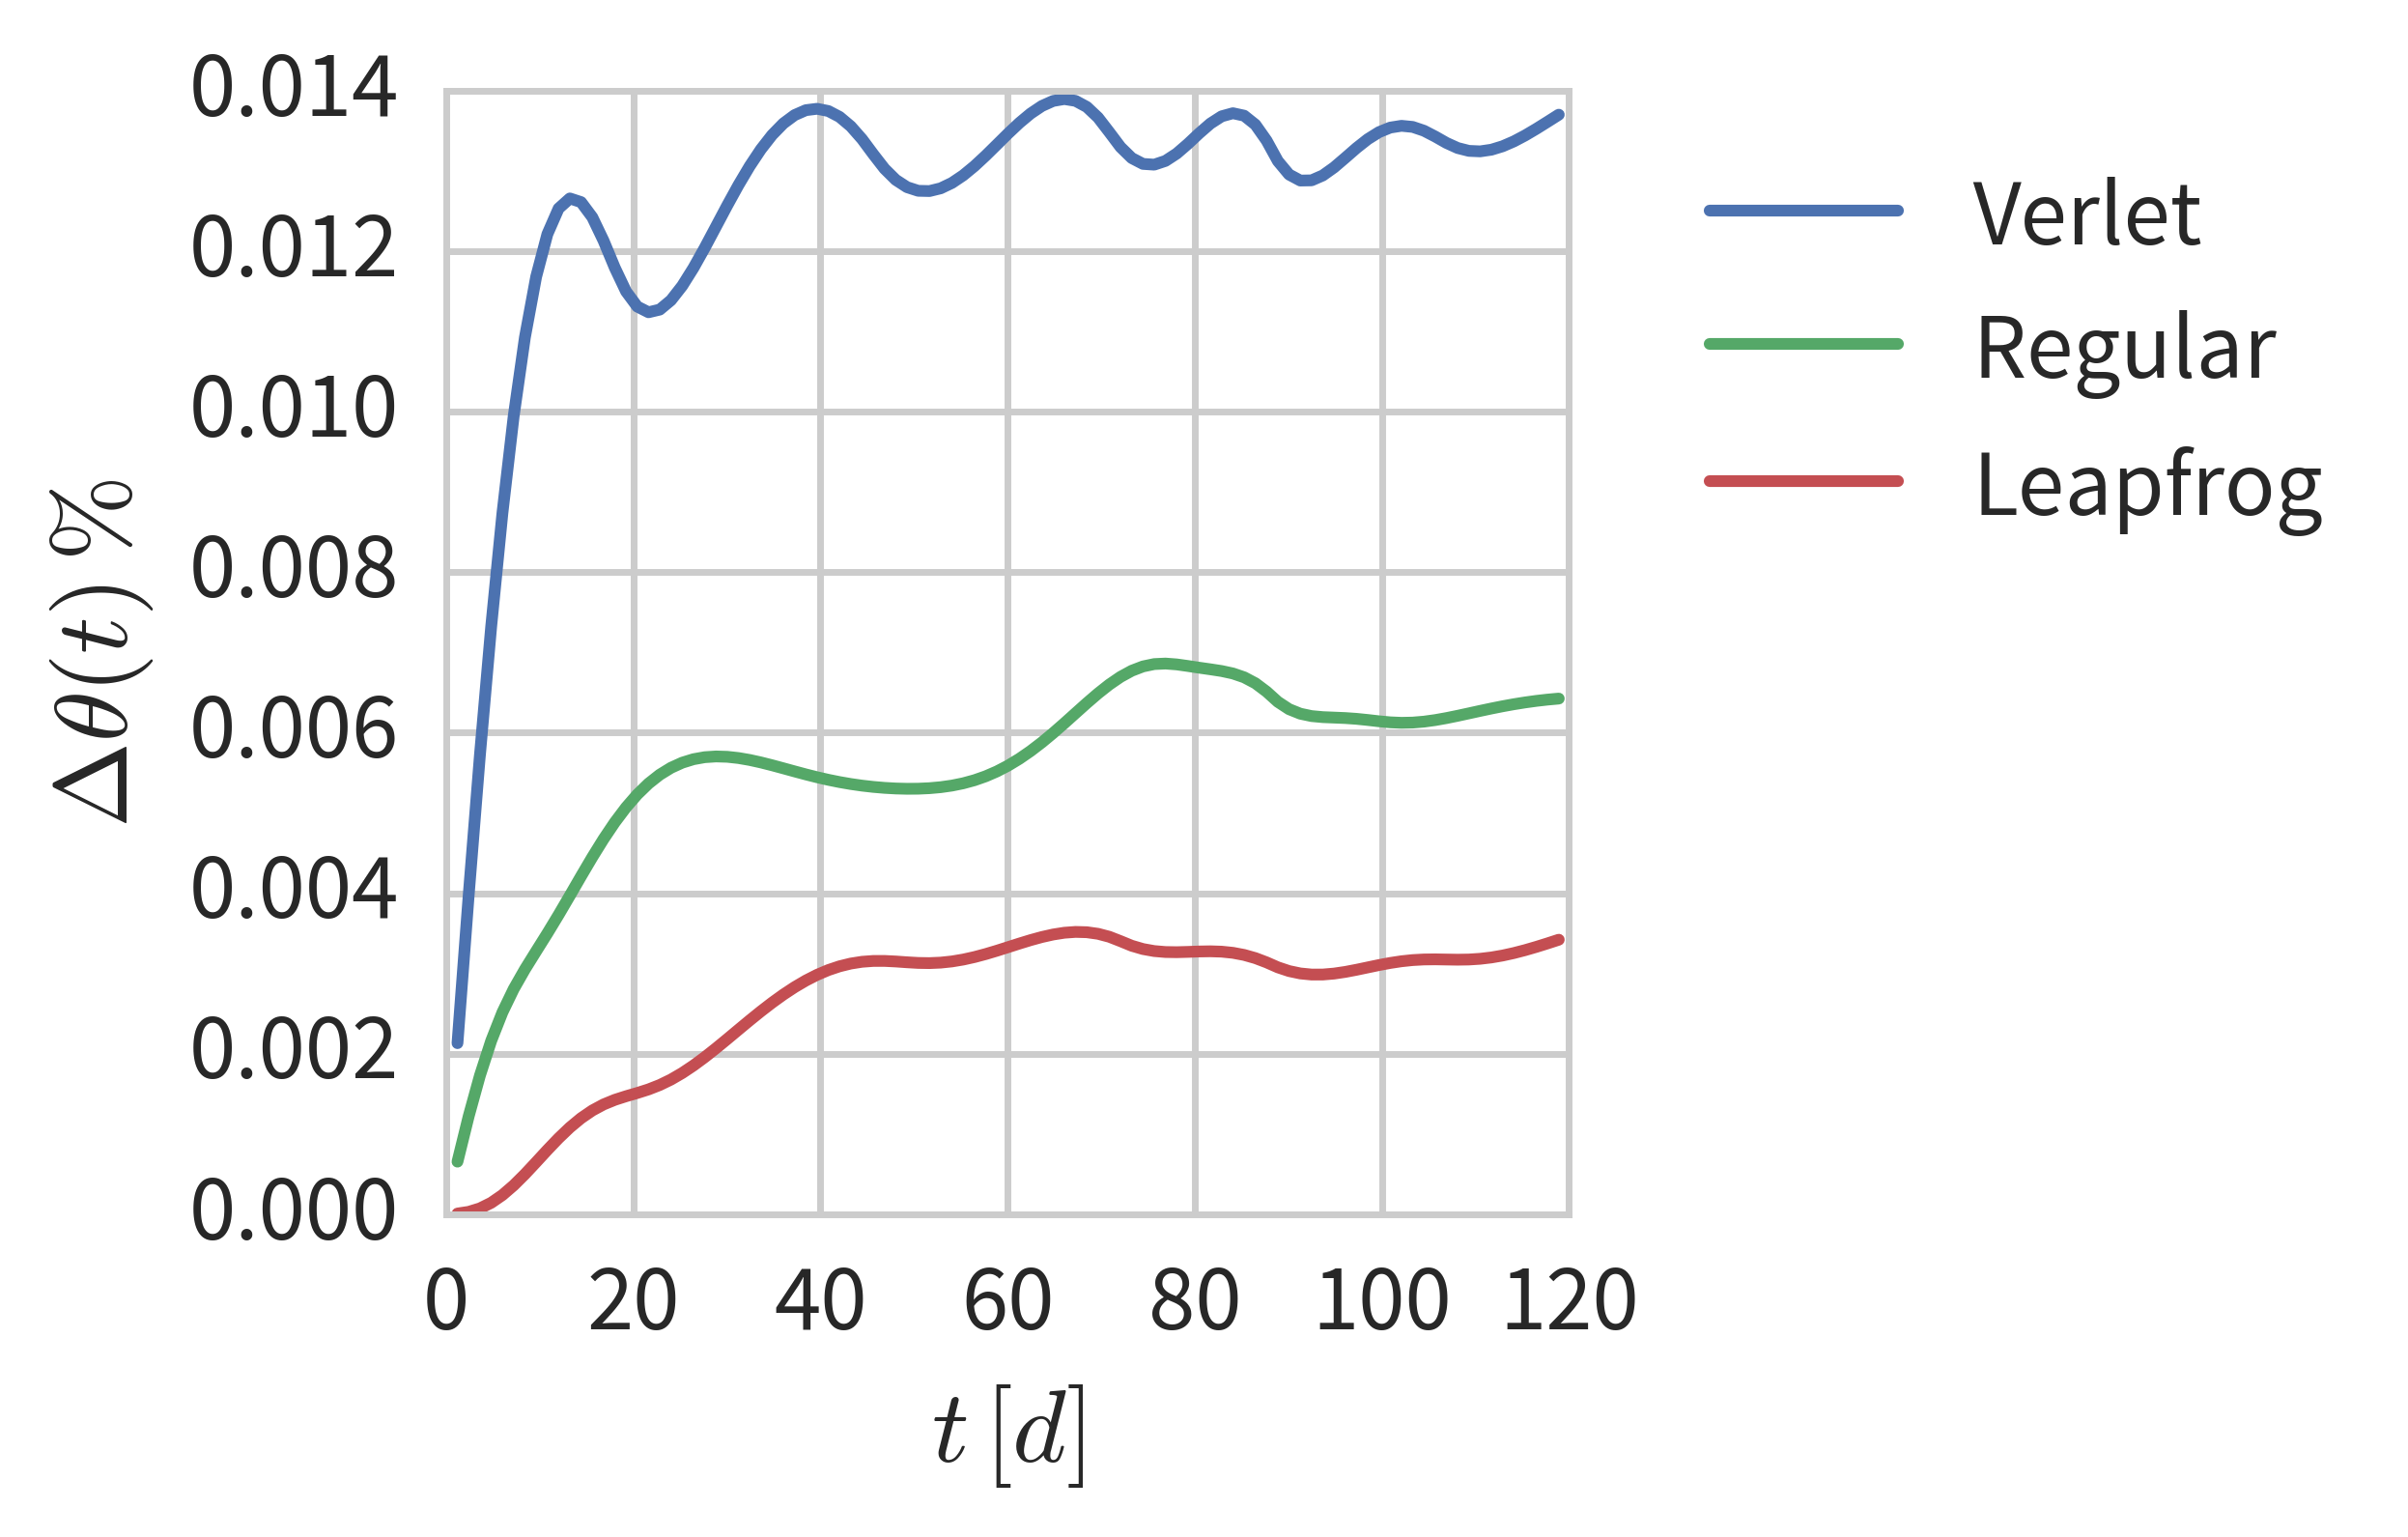

In [24]:
fig = plt.figure(figsize=(3,3), dpi=500)


for key in ["Verlet", "Regular","Leapfrog"]:
    plt.plot(trange[::NStep], DeltaTheta[key], label=key)

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1.))

plt.xlabel("$t \, [d]$")

plt.ylabel(r"$\Delta \theta(t) \, \%$")

ax = plt.gca()

plt.show()